<a href="https://colab.research.google.com/github/ndoshi83/NBA_Players_Unit1_Project/blob/master/NDoshi_DS4_Unit1_Project_Week_NBA_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Import data
nba = pd.read_csv('https://raw.githubusercontent.com/ndoshi83/NBA_Players_Unit1_Project/master/Seasons_Stats.csv',
                  error_bad_lines = False, na_values = '  nan')

nba.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [0]:
# Remove additional index column
del nba['Unnamed: 0'] # Only needs to be run once after original file is loaded

nba.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [0]:
# Show counts in data set
nba.count()

Year      24624
Player    24624
Pos       24624
Age       24616
Tm        24624
G         24624
GS        18233
MP        24138
PER       24101
TS%       24538
3PAr      18839
FTr       24525
ORB%      20792
DRB%      20792
TRB%      21571
AST%      22555
STL%      20792
BLK%      20792
TOV%      19582
USG%      19640
blanl         0
OWS       24585
DWS       24585
WS        24585
WS/48     24101
blank2        0
OBPM      20797
DBPM      20797
BPM       20797
VORP      20797
FG        24624
FGA       24624
FG%       24525
3P        18927
3PA       18927
3P%       15416
2P        24624
2PA       24624
2P%       24496
eFG%      24525
FT        24624
FTA       24624
FT%       23766
ORB       20797
DRB       20797
TRB       24312
AST       24624
STL       20797
BLK       20797
TOV       19645
PF        24624
PTS       24624
dtype: int64

In [0]:
# Look at column data types
nba.dtypes

Year      float64
Player     object
Pos        object
Age       float64
Tm         object
G         float64
GS        float64
MP        float64
PER       float64
TS%       float64
3PAr      float64
FTr       float64
ORB%      float64
DRB%      float64
TRB%      float64
AST%      float64
STL%      float64
BLK%      float64
TOV%      float64
USG%      float64
blanl     float64
OWS       float64
DWS       float64
WS        float64
WS/48     float64
blank2    float64
OBPM      float64
DBPM      float64
BPM       float64
VORP      float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
dtype: object

In [0]:
# Check data set to see blank value counts in each column
nba.isna().sum()

Year         67
Player       67
Pos          67
Age          75
Tm           67
G            67
GS         6458
MP          553
PER         590
TS%         153
3PAr       5852
FTr         166
ORB%       3899
DRB%       3899
TRB%       3120
AST%       2136
STL%       3899
BLK%       3899
TOV%       5109
USG%       5051
blanl     24691
OWS         106
DWS         106
WS          106
WS/48       590
blank2    24691
OBPM       3894
DBPM       3894
BPM        3894
VORP       3894
FG           67
FGA          67
FG%         166
3P         5764
3PA        5764
3P%        9275
2P           67
2PA          67
2P%         195
eFG%        166
FT           67
FTA          67
FT%         925
ORB        3894
DRB        3894
TRB         379
AST          67
STL        3894
BLK        3894
TOV        5046
PF           67
PTS          67
dtype: int64

In [0]:
# Remove NaN rows to clean the data
nba = nba.dropna(subset = ['Year'])

In [0]:
# Review Pos field as that will be used to group stats
nba['Pos'].unique()

array(['G-F', 'SG', 'SF', 'F', 'G', 'F-C', 'PG', 'F-G', 'C', 'PF', 'C-F',
       'PF-C', 'SF-SG', 'C-PF', 'SG-SF', 'PF-SF', 'SF-PF', 'SG-PG',
       'SF-PG', 'C-SF', 'PG-SG', 'PG-SF', 'SG-PF'], dtype=object)

In [0]:
# Convert Pos values to all G, F, and C values to allow for grouping
nba['Pos'] = nba['Pos'].str.replace('S', '') # Remove S from SG and SF
nba['Pos'] = nba['Pos'].str.replace('P', '') # Remove P from PG and PF

In [0]:
# Convert Pos values where there are 2 positions listed ie G-F to single G by taking the first listed
nba['Pos'] = nba['Pos'].str[0]

In [0]:
# Create new dataframe with only needs features
nba_position = nba[['Year', 'Pos', 'G','PTS']].copy()

nba_position.head()

,Year,Pos,G,PTS
0,1950.0,G,63.0,458.0
1,1950.0,G,49.0,279.0
2,1950.0,F,67.0,438.0
3,1950.0,F,15.0,63.0
4,1950.0,F,13.0,59.0


In [0]:
# Convert year to int to remove decimal
nba_position['Year'] = nba_position['Year'].astype(int)

nba_position.head()

,Year,Pos,G,PTS
0,1950,G,63.0,458.0
1,1950,G,49.0,279.0
2,1950,F,67.0,438.0
3,1950,F,15.0,63.0
4,1950,F,13.0,59.0


In [0]:
# Group by year and position to get total games and points
nba_pos_final = nba_position.groupby(['Year', 'Pos']).sum().reset_index()

In [0]:
# Create additional feature to show points per game for each position
nba_pos_final['PTS_per_G'] = nba_pos_final['PTS']/nba_pos_final['G']

nba_pos_final.head()

,Year,Pos,G,PTS,PTS_per_G
0,1950,C,2184.0,18991.0,8.695513
1,1950,F,5800.0,44519.0,7.675690
2,1950,G,5396.0,40052.0,7.422535
3,1951,C,1359.0,14470.0,10.647535
4,1951,F,3375.0,26555.0,7.868148


In [0]:
# Round points per game column
nba_pos_final['PTS_per_G'] = nba_pos_final['PTS_per_G'].round(1)

nba_pos_final.head()

,Year,Pos,G,PTS,PTS_per_G
0,1950,C,2184.0,18991.0,8.7
1,1950,F,5800.0,44519.0,7.7
2,1950,G,5396.0,40052.0,7.4
3,1951,C,1359.0,14470.0,10.6
4,1951,F,3375.0,26555.0,7.9


In [0]:
# Create crosstab to show points per game for each year by position
ct = pd.crosstab(nba_pos_final.Year, nba_pos_final.Pos, 
                 values = nba_pos_final.PTS_per_G, 
                 aggfunc = 'mean',
                 colnames = ['Position'],
                 rownames = ['Year']).fillna('-')

ct.head()

Position,C,F,G
Year,,,
1950,8.7,7.7,7.4
1951,10.6,7.9,8.4
1952,11.1,8.8,8.5
1953,10.8,8.1,8.7
1954,12.7,7.1,8.4


In [0]:
# Import seaborn plot library
import seaborn as sns

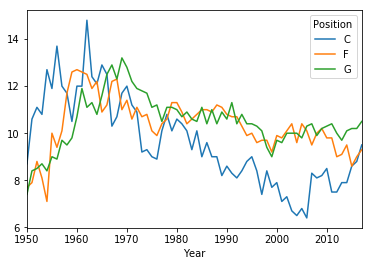

In [0]:
# Plot crosstab to show trend
ct.plot();

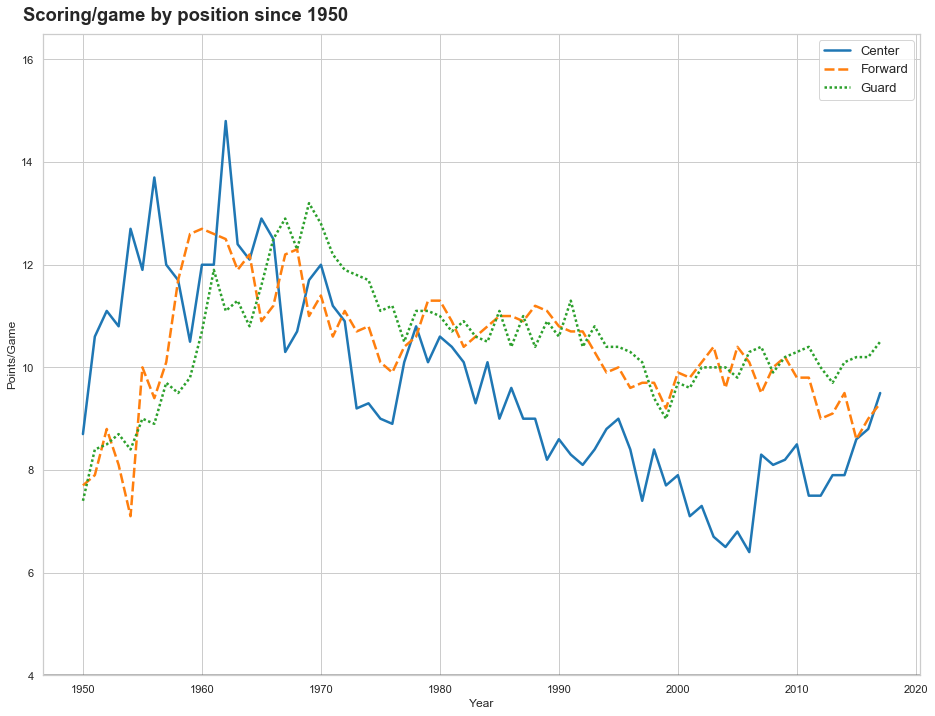

In [0]:
# Set seaborn plot style
sns.set(style = 'whitegrid')

fig = plt.figure(figsize=(14,11)) # Set size of plot figure

# Plot the data
ax = sns.lineplot(data = ct, palette = 'tab10', linewidth = '2.5')

# Set Y limits
plt.ylim(4,16.5)

# Add Y labels
ax.set_ylabel('Points/Game')

# Add bolded line to x axis
ax.axhline(y=4.01, color='#414141', linewidth=1.5, alpha=.5)

# Add title to plot
ax.text(x=1945, y=16.75, s="Scoring/game by position since 1950", fontsize=18.5, fontweight='semibold')

# Update legend labels
plt.legend(['Center', 'Forward', 'Guard'], prop = {'size': 13})

# Save figure to file
plt.savefig('pts_per_game.png')

In [0]:
# Next we will look at number of players per position by year
# Create dataframe with needed info from original dataframe
nba_players = nba[['Year', 'Player', 'Pos']].copy()

# Remove duplicate rows
nba_players = nba_players.drop_duplicates()

# Convert year to int to remove decimal
nba_players['Year'] = nba_players['Year'].astype(int)

nba_players.head()

,Year,Player,Pos
0,1950,Curly Armstrong,G
1,1950,Cliff Barker,G
2,1950,Leo Barnhorst,F
3,1950,Ed Bartels,F
6,1950,Ralph Beard,G


In [0]:
ct2 = pd.crosstab(nba_players.Year,nba_players.Pos)

ct2.head()

Pos,C,F,G
Year,,,
1950,33,93,97
1951,20,62,53
1952,19,51,46
1953,19,51,55
1954,17,50,44


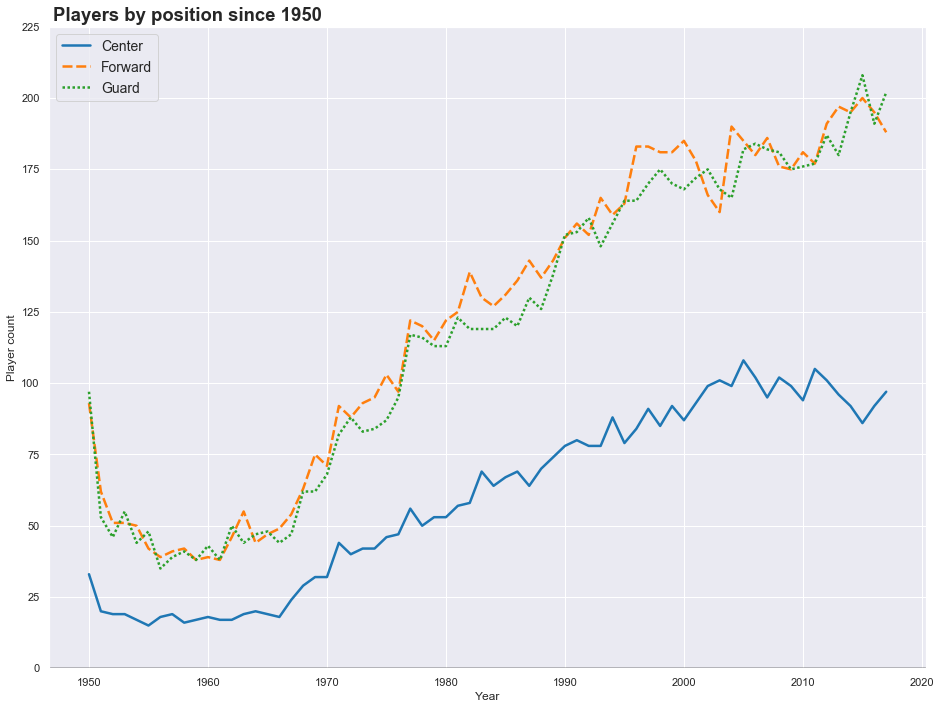

In [0]:
# Set seaborn plot style
sns.set(style = 'darkgrid')

fig2 = plt.figure(figsize=(14,11)) # Set size of plot figure

# Plot the data
ax = sns.lineplot(data = ct2, palette = 'tab10', linewidth = '2.5')

# Set Y limits
plt.ylim(0,225)

# Add Y labels
ax.set_ylabel('Player count')

# Add bolded line to x axis
ax.axhline(y=0, color='#414141', linewidth=1.5, alpha=.5)

# Add title to plot
ax.text(x=1947, y=227, s="Players by position since 1950", fontsize=18.5, fontweight='semibold')

# Update legend labels
plt.legend(['Center', 'Forward', 'Guard'], prop = {'size': 14})

# Save figure to file
plt.savefig('players.png')